In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Sources: https://learnopencv.com/blob-detection-using-opencv-python-c/
#          https://abauville.medium.com/display-your-live-webcam-feed-in-a-jupyter-notebook-using-opencv-d01eb75921d1

# Review
* How are dilate and erode calculated?
  * What's a structuring element?
* Give a brief explanation of what each channel in the HSV colorspace represents
  * Add an example of how that channel is used to isolate objects or features
* What does the Gaussian function look like (draw it) and how does sigma affect its shape?
  * What effect does this have on the strength of the blur effect?
* Describe how the blur function is used to implement image sharpening

In [2]:
blob_tester = cv2.imread('BlobTest.jpg')

First let's look `SimpleBlobDetector` which wraps many useful features into one function

In [95]:
def detect(img):
    params = cv2.SimpleBlobDetector_Params()
    
    # Change thresholds
    # Simple blob detector performs its own internal threshold meaning the input
    # image does always need thresholding
    params.minThreshold = 50;
    params.maxThreshold = 100;

    # Filter by Area (pixels)
    params.filterByArea = True
    params.minArea = 1000
    params.maxArea = 1000000

    # Filter by Circularity (0.0 to 1.0)
    # Defined as (4 * pi * Area) / (perimeter**2)
    params.filterByCircularity = False
    params.minCircularity = 0.9
    params.maxCircularity = 1.0

    # Filter by Convexity (0.0 to 1.0)
    params.filterByConvexity = False
    params.minConvexity = 0.01
    params.maxConvexity = 1.0

    # Filter by Inertia (0.0 to 1.0)
    # This value describes how "long" something is. An even shape like a circle is 1.0,
    # a line which has an effectively infinite length to width ratio is 0.0
    params.filterByInertia = False
    params.minInertiaRatio = 0.8
    params.minInertiaRatio = 1.0

    detector = cv2.SimpleBlobDetector_create(params)

    return detector.detect(img)

def draw_detections(img, keypts):
    im_w_pts = cv2.drawKeypoints(
        img,
        keypts,
        np.array([]),
        (0,0,255),
        cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    return im_w_pts

(< cv2.KeyPoint 0x7f87fedb5b40>, < cv2.KeyPoint 0x7f87feb7b1b0>)


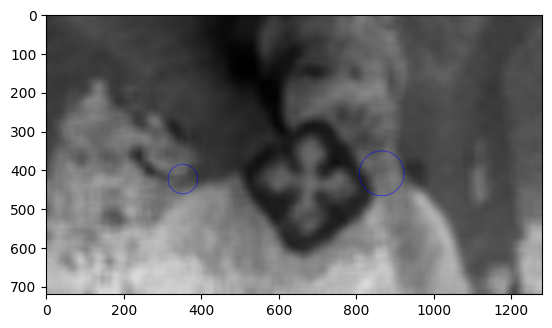

In [96]:
myimg = cv2.imread('coaster.jpg')
hsvimg = cv2.cvtColor(myimg, cv2.COLOR_BGR2HSV)

# hsvimg = cv2.cvtColor(myimg, cv2.COLOR_BGR2HSV)
# grayimg = cv2.inRange(hsvimg, (50, 0, 0), (100, 255, 255))

# grayimg = cv2.GaussianBlur(grayimg, (15,15), 256)
# grayimg = cv2.erode(grayimg, np.ones((7,7)))


channel = hsvimg[:, :, 1]

channel = cv2.GaussianBlur(channel, (31,31), 256)

pts = detect(channel)
print(pts)
plt.imshow(draw_detections(channel, pts))

Try this yourself: edit the parameters in `detect` to isolate one of the non-circular shapes.